<a href="https://colab.research.google.com/github/nattntn/15-23yrs_EffNet/blob/main/Transfer_with_Age/Test/15_23_13_Eff_Regress_Predict_Freeze_250_Unflipped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clone Efficient

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(15-23)/13_Re_1e-5_250_Freeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(15-23)/13_Re_1e-5_250_Freeze.h5')
height = width = model.input_shape[1]

#Prepare Data

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(15-23)/table_train_15_23_fold.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold
0,1833,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B07.jpg,9
1,1834,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB07.jpg,7
2,1835,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B08.jpg,5
3,1836,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB08.jpg,10
4,1837,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B18.jpg,8
...,...,...,...,...,...,...,...,...
1947,3780,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE429.jpg,10
1948,3781,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E430.jpg,6
1949,3782,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipE430.jpg,10
1950,3783,23,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,E431.jpg,10


In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 1952 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(15-23)/table_test_15_23_forGender.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female
1,1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female
2,2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female
3,3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female
4,4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female
...,...,...,...,...,...,...,...,...,...
445,445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
446,446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
447,447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
448,448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


In [ ]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,0,Female
1,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,0,Female
2,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,0,Female
3,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,0,Female
4,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,0,Female
...,...,...,...,...,...,...,...,...
445,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,0,Female
446,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,1,Male
447,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,1,Male
448,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,0,Female


# Predict

In [ ]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 9s 9s/step


16.016169

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 28ms/step


In [ ]:
pred_list

[16.016169,
 15.708344,
 17.864275,
 16.663609,
 15.587444,
 16.057888,
 16.588663,
 16.403198,
 14.515461,
 17.244467,
 17.792356,
 16.87446,
 15.987316,
 15.303122,
 15.746246,
 15.909959,
 15.760205,
 14.433721,
 17.088043,
 16.219389,
 16.786139,
 17.727072,
 17.523546,
 18.652407,
 17.433058,
 16.165384,
 15.755722,
 14.758913,
 14.438236,
 12.80231,
 15.057943,
 15.599493,
 16.61415,
 17.091824,
 14.693678,
 16.209743,
 17.239607,
 16.097046,
 14.070677,
 13.950296,
 15.132999,
 15.573551,
 16.318657,
 16.681028,
 12.438984,
 14.181338,
 15.463266,
 14.223562,
 14.6493225,
 16.157848,
 21.010084,
 18.003685,
 17.510153,
 17.730122,
 17.238375,
 16.201164,
 16.149693,
 16.225132,
 16.49909,
 15.44281,
 15.517759,
 16.696556,
 16.747112,
 15.070089,
 16.612322,
 18.945967,
 16.65249,
 16.049227,
 17.044374,
 13.399186,
 13.7148,
 16.114038,
 16.39494,
 15.1403055,
 17.8394,
 17.393269,
 15.798775,
 16.191824,
 14.13647,
 15.872268,
 15.125358,
 15.723187,
 17.957117,
 16.91082,
 14

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
pred_int = np.around(pred_list)

In [ ]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [ ]:
pred

array([16., 16., 18., 17., 16., 16., 17., 16., 15., 17., 18., 17., 16.,
       15., 16., 16., 16., 14., 17., 16., 17., 18., 18., 19., 17., 16.,
       16., 15., 14., 13., 15., 16., 17., 17., 15., 16., 17., 16., 14.,
       14., 15., 16., 16., 17., 12., 14., 15., 14., 15., 16., 21., 18.,
       18., 18., 17., 16., 16., 16., 16., 15., 16., 17., 17., 15., 17.,
       19., 17., 16., 17., 13., 14., 16., 16., 15., 18., 17., 16., 16.,
       14., 16., 15., 16., 18., 17., 14., 15., 17., 16., 17., 19., 16.,
       16., 16., 15., 16., 15., 16., 17., 16., 19., 20., 17., 16., 16.,
       17., 15., 16., 18., 18., 17., 16., 18., 18., 14., 15., 20., 18.,
       17., 15., 17., 18., 19., 19., 18., 17., 19., 16., 20., 19., 18.,
       18., 20., 21., 18., 18., 16., 18., 17., 16., 16., 15., 18., 16.,
       16., 19., 15., 16., 17., 17., 17., 17., 17., 17., 18., 18., 17.,
       18., 19., 18., 18., 17., 18., 18., 19., 15., 18., 17., 16., 15.,
       18., 19., 18., 16., 17., 16., 18., 19., 20., 16., 18., 15

#confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 18.444444444444443%
              precision    recall  f1-score   support

        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.30      0.16      0.21        51
        16.0       0.32      0.38      0.35        50
        17.0       0.12      0.16      0.14        51
        18.0       0.18      0.28      0.22        50
        19.0       0.17      0.33      0.23        49
        20.0       0.14      0.18      0.16        49
        21.0       0.22      0.16      0.19        50
        22.0       0.14      0.02      0.04        50
        23.0       0.00      0.00      0.00        50
        24.0       0.00      0.00      0.00         0

    accuracy                           0.18       450
   macro avg       0.12      0.13      0.12       450
weighted avg       0.18      0.18      0.17       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

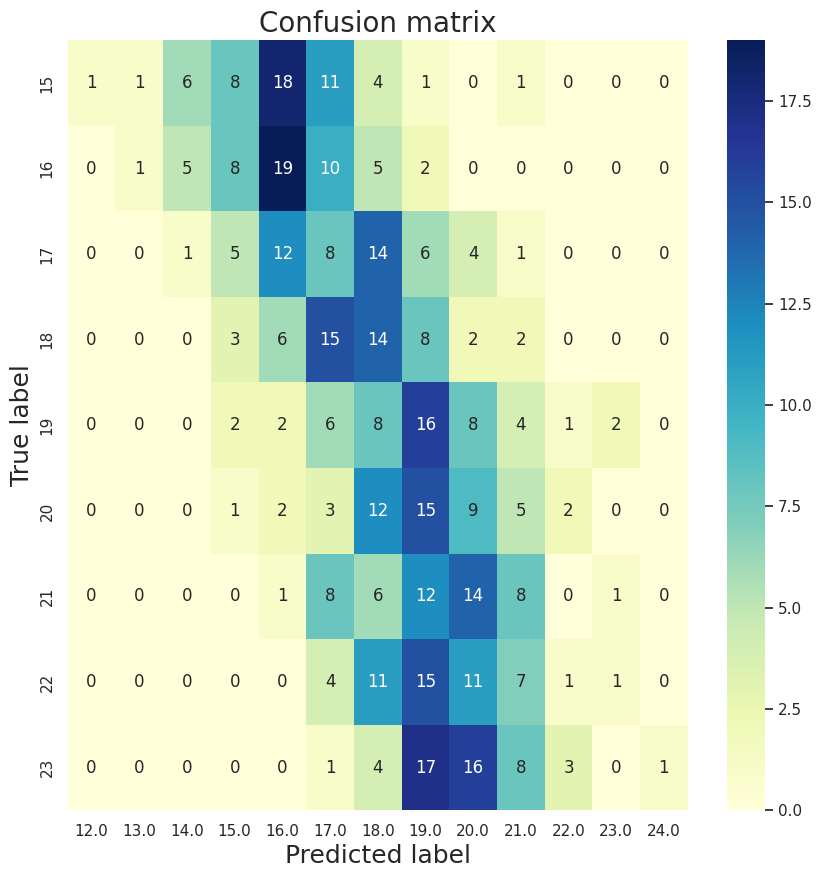

In [ ]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.7066666666666668
MSE: 4.702222222222222
RMSE: 2.1684607956387456


In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act, pred, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act, pred, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act, pred, multioutput= 'variance_weighted'))

R-squared: 0.299080383452055
R-squared: [0.29908038]
R-squared: 0.299080383452055
